# Final Project: COVID-19 Vaccinations and PCR Tests

This program analyzes the COVID-19 vaccinations and positive pcr tests in the United States. 

In [1]:
## import two libraries needed for this project: pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

## Parsing the data

The data below is the COVID-19 Vaccinations in the United States by county. I found this data from Data.org. The dataset comes from a reliable government source, the Center for Disease Control and Prevention. Go to the following link to access the data: https://catalog.data.gov/dataset/covid-19-vaccinations-in-the-united-statescounty 

In [2]:
## import the data using pd.read_csv and assign to dataframe df_vaccine_original
df_vaccine_original = pd.read_csv('COVID-19_Vaccinations_in_the_United_States_County.csv')

The data below is the COVID-19 Diagnostic Laboratory Testing (PCR Testing) Time Series in the United States. I found this data from Data.org. The dataset comes from a reliable government source, the US Department of Health & Human Services. Go to the following link to access the data: https://catalog.data.gov/dataset/covid-19-diagnostic-laboratory-testing-pcr-testing-time-series-80872 

In [3]:
## import the data using pd.read_csv and assign to dataframe df_tests_original
df_tests_original = pd.read_csv('COVID-19_Diagnostic_Laboratory_Testing__PCR_Testing__Time_Series.csv')

Here I used .info() function to look at the columns and their data types. The df_vaccine_original dataframe is a big dataframe so I looked at the columns to see which ones are useful for my project and which ones are not. By deleting columns, I save processing power for the virtual machine.

In [4]:
df_vaccine_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1818325 entries, 0 to 1818324
Data columns (total 66 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   Date                                     object 
 1   FIPS                                     object 
 2   MMWR_week                                int64  
 3   Recip_County                             object 
 4   Recip_State                              object 
 5   Completeness_pct                         float64
 6   Administered_Dose1_Recip                 float64
 7   Administered_Dose1_Pop_Pct               float64
 8   Administered_Dose1_Recip_5Plus           float64
 9   Administered_Dose1_Recip_5PlusPop_Pct    float64
 10  Administered_Dose1_Recip_12Plus          float64
 11  Administered_Dose1_Recip_12PlusPop_Pct   float64
 12  Administered_Dose1_Recip_18Plus          float64
 13  Administered_Dose1_Recip_18PlusPop_Pct   float64
 14  Administered_Dose1

I decided to focus on the data for the first doses, which falls under the columns that start with "Administered_Dose1." The code below drops columns 16 to 65, which includes data about booster shots. I assigned the new dataframe with the dropped columns to the name df_vaccine_drop

In [5]:
df_vaccine_drop = df_vaccine_original.drop(df_vaccine_original.columns[16:66], axis=1)

Here i tested to see if the code above worked to delete the columns and it did because now the dataframe has 16 columns instead of 66.

In [6]:
df_vaccine_drop

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct
0,07/06/2022,38003,27,Barnes County,ND,92.7,6941.0,66.6,6939.0,70.0,6737.0,73.8,6371.0,76.1,2273.0,93.9
1,07/06/2022,37153,27,Richmond County,NC,96.9,27524.0,61.4,27509.0,65.4,27003.0,71.0,25695.0,74.4,8330.0,95.0
2,07/06/2022,55025,27,Dane County,WI,96.8,497377.0,91.0,495081.0,95.0,464518.0,95.0,430414.0,95.0,85815.0,95.0
3,07/06/2022,53017,27,Douglas County,WA,96.1,29274.0,67.4,29263.0,72.1,28209.0,78.3,26166.0,81.1,6618.0,83.9
4,07/06/2022,27165,27,Watonwan County,MN,94.6,6709.0,61.6,6697.0,66.3,6374.0,70.0,5909.0,71.6,1925.0,86.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818320,12/13/2020,06007,51,Butte County,CA,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1818321,12/13/2020,18147,51,Spencer County,IN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1818322,12/13/2020,19083,51,Hardin County,IA,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1818323,12/13/2020,28021,51,Claiborne County,MS,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


Here I used .info() function to look at the columns and their data types. The df_tests_original dataframe is a not a big dataframe because it only has 9 columns. I decided not to delete columns because I wouldn't be saving too much processing power for the virtual machine.

In [7]:
df_tests_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139098 entries, 0 to 139097
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   state                   139098 non-null  object 
 1   state_name              139098 non-null  object 
 2   state_fips              139098 non-null  int64  
 3   fema_region             139098 non-null  object 
 4   overall_outcome         139098 non-null  object 
 5   date                    139098 non-null  object 
 6   new_results_reported    139098 non-null  int64  
 7   total_results_reported  139098 non-null  int64  
 8   geocoded_state          0 non-null       float64
dtypes: float64(1), int64(3), object(5)
memory usage: 9.6+ MB


# Question 1: Which states in the United States have administered the most first doses of the COVID-19 vaccine?

Here I used the .columns method to look at the column names of the df_vaccine_drop dataframe. I want to see the vaccine doses by state, so I will need the 'Recip_State' column for the state. I also want to see the total administration of first doses, so I will need the 'Administered_Dose1_Recip' column.

In [8]:
df_vaccine_drop.columns

Index(['Date', 'FIPS', 'MMWR_week', 'Recip_County', 'Recip_State',
       'Completeness_pct', 'Administered_Dose1_Recip',
       'Administered_Dose1_Pop_Pct', 'Administered_Dose1_Recip_5Plus',
       'Administered_Dose1_Recip_5PlusPop_Pct',
       'Administered_Dose1_Recip_12Plus',
       'Administered_Dose1_Recip_12PlusPop_Pct',
       'Administered_Dose1_Recip_18Plus',
       'Administered_Dose1_Recip_18PlusPop_Pct',
       'Administered_Dose1_Recip_65Plus',
       'Administered_Dose1_Recip_65PlusPop_Pct'],
      dtype='object')

To find the total adminstered first doses by state, I need to group by the state so I use the .groupby() function that groups by 'Recip_State'.
After grouping the data by state, I want to sum the total number of doses so I use the .sum() function to sum the doses for the states that were grouped by. I assign this groupedby and summed data frame to a new one named df_vaccine_pie

In [9]:
df_vaccine_pie = df_vaccine_drop.groupby('Recip_State')
df_vaccine_pie = df_vaccine_pie[['Administered_Dose1_Recip']].sum()

I want my data to be clean for a pie chart, so I sorted the data in descending order for adminsitered first doses by using the .sort_values() function with ascending=False

In [10]:
df_vaccine_pie = df_vaccine_pie.sort_values(by='Administered_Dose1_Recip',ascending=False)

Here I typed in df_vaccine_pie to see if the grouping, summing, and sorted worked. And it did!

In [11]:
df_vaccine_pie

,Administered_Dose1_Recip
Recip_State,
CA,1.304069e+10
NY,6.592033e+09
FL,6.543527e+09
TX,4.841505e+09
PA,4.296308e+09
IL,3.901269e+09
NC,3.173927e+09
NJ,2.916286e+09
VA,2.785466e+09


Finally, to answer my first question, I use the df_vaccine_pie dataframe and plot it into a pie chart. I do this by using the .plot() function and assign the y value to 'Administered_Dose1_Recip', kind to equals 'pie', and display the percentage points in the format '%1.1f%%'. To make the pie chart look pretty, I added a title, eliminated the y label and legend, and used plt.show().

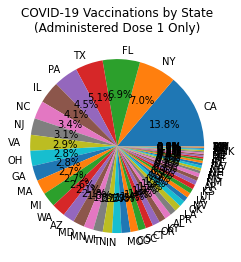

In [12]:
df_vaccine_pie.plot(y='Administered_Dose1_Recip',kind='pie',autopct='%1.1f%%')

plt.title("COVID-19 Vaccinations by State\n(Administered Dose 1 Only)")

ax = plt.gca() 
ax.autopct='%1.1f%%'
ax.set_ylabel('')
ax.get_legend().remove()

plt.show()

Answer to Question 1: California (13.8%), New York (7.0%), Florida (6.9%), and Texas (5.1%) are the states that have administed the most first doses of the COVID-19 vaccine in the United States. This could be because these states have higher populations compared to other states. But regardless, these states can be further investigated to serve as models for administering COVID-19 vaccines for such a large portion of the United States population.

# Question 2: What are the trends over time in the United States for the administration of first doses for the COVID-19 vaccine?

To answer this question, I am especially interested in the Date information. I use the .info() function to look at the Date columns, and I see that the data type is an object. I'm also interested in the Administered_Dose1 columns and see that they are in float64 data types.

In [13]:
df_vaccine_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1818325 entries, 0 to 1818324
Data columns (total 16 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   Date                                    object 
 1   FIPS                                    object 
 2   MMWR_week                               int64  
 3   Recip_County                            object 
 4   Recip_State                             object 
 5   Completeness_pct                        float64
 6   Administered_Dose1_Recip                float64
 7   Administered_Dose1_Pop_Pct              float64
 8   Administered_Dose1_Recip_5Plus          float64
 9   Administered_Dose1_Recip_5PlusPop_Pct   float64
 10  Administered_Dose1_Recip_12Plus         float64
 11  Administered_Dose1_Recip_12PlusPop_Pct  float64
 12  Administered_Dose1_Recip_18Plus         float64
 13  Administered_Dose1_Recip_18PlusPop_Pct  float64
 14  Administered_Dose1_Recip_65Plus   

I then look at the df_vaccine_drop dataframe to see how the Date is formated. It is formatted in terms of month/day/year which is not good because it is hard to use this data format for a trend over time analysis

In [14]:
df_vaccine_drop

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct
0,07/06/2022,38003,27,Barnes County,ND,92.7,6941.0,66.6,6939.0,70.0,6737.0,73.8,6371.0,76.1,2273.0,93.9
1,07/06/2022,37153,27,Richmond County,NC,96.9,27524.0,61.4,27509.0,65.4,27003.0,71.0,25695.0,74.4,8330.0,95.0
2,07/06/2022,55025,27,Dane County,WI,96.8,497377.0,91.0,495081.0,95.0,464518.0,95.0,430414.0,95.0,85815.0,95.0
3,07/06/2022,53017,27,Douglas County,WA,96.1,29274.0,67.4,29263.0,72.1,28209.0,78.3,26166.0,81.1,6618.0,83.9
4,07/06/2022,27165,27,Watonwan County,MN,94.6,6709.0,61.6,6697.0,66.3,6374.0,70.0,5909.0,71.6,1925.0,86.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818320,12/13/2020,06007,51,Butte County,CA,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1818321,12/13/2020,18147,51,Spencer County,IN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1818322,12/13/2020,19083,51,Hardin County,IA,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1818323,12/13/2020,28021,51,Claiborne County,MS,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In the code below I change the format of the date to year/month/day. I do this by changing the Date column from an object to a date time data type by using the pd.to_datetime() fuction. Then I use the .dt.strftime() functin to change the format of the date time to year/month/day by inserting '%Y/%m/%d' inside the function. 

In [15]:
df_vaccine_drop['Date'] = pd.to_datetime(df_vaccine_drop.Date)
df_vaccine_drop['Date'] = df_vaccine_drop['Date'].dt.strftime('%Y/%m/%d')

To analyze the trends over time, I grouped the data frame by Date. After grouping it, I summed the relavante columns which include: 'Administered_Dose1_Recip', 'Administered_Dose1_Recip_5Plus', 'Administered_Dose1_Recip_12Plus', 'Administered_Dose1_Recip_18Plus', 'Administered_Dose1_Recip_65Plus'. Laslty, I assigned this new grouped by and summed data frame to a new one called df_vaccine_line.

In [16]:
df_vaccine_line = df_vaccine_drop.groupby('Date')
df_vaccine_line = df_vaccine_line[['Administered_Dose1_Recip',
       'Administered_Dose1_Recip_5Plus',
       'Administered_Dose1_Recip_12Plus',
       'Administered_Dose1_Recip_18Plus',
       'Administered_Dose1_Recip_65Plus',]].sum()

Ensuring that the dates are in order, I sorted the Date values in ascending order by using the .sort_values() function and having ascending = True.

In [17]:
df_vaccine_line = df_vaccine_line.sort_values(by='Date',ascending=True)

Next, I called the df_vaccine_line to see if the date time formatting, grouping, summing, and ascending ordering worked. And it did!

In [18]:
df_vaccine_line

,Administered_Dose1_Recip,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_65Plus
Date,,,,,
2020/12/13,0.0,0.0,0.0,0.0,0.0
2020/12/14,0.0,0.0,0.0,0.0,0.0
2020/12/15,514.0,0.0,514.0,514.0,17.0
2020/12/16,6153.0,0.0,6151.0,6152.0,323.0
2020/12/17,37298.0,0.0,37269.0,37285.0,2592.0
...,...,...,...,...,...
2022/06/15,256221418.0,256213774.0,245917979.0,228509488.0,56560111.0
2022/06/16,256271068.0,256262840.0,245960039.0,228546947.0,56570137.0
2022/06/22,256497938.0,256484755.0,246148009.0,228713209.0,56610990.0


The dataframe is finally ready for the analysis. I decided to use a line plot to show the trends over time by using the .plot() functin and making kind equal 'line'. To make the line graph look pretty, I added a title, x label, y label, set the y limit from 0 to 300,000,000, included a legend, and put plt.show() function. 

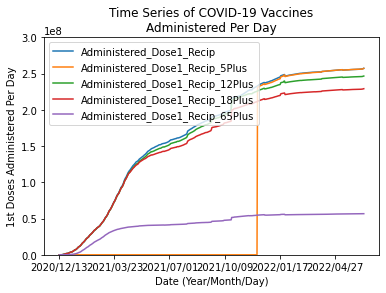

In [19]:
df_vaccine_line.plot(kind='line')

plt.title('Time Series of COVID-19 Vaccines\nAdministered Per Day')

ax = plt.gca()
ax.set_xlabel('Date (Year/Month/Day)')
ax.set_ylabel('1st Doses Administered Per Day')
plt.ylim([0,300000000])
plt.legend()

plt.show()

Answer to Question 2: The first doses of the COVID-19 vaccine began to be adminstered in 2020/12/15. There was a sharp increase in vaccination from then until 2021/03/23 to 1.5 1e8, and after that there was a slow and steady incease to around 2.5 1e8. The first dose vaccination have stayed at a constant rate of 2.5 1e8 since then. The graph is also interesting in that it separates the vaccination by ages from 5 plus (orange), 12 plus (green), 18 plus (red), and 65 plus (purple). 5 Plus has the most interesting trend because it is zero until after 2021/10/09 and shoots up very high. This may be because people under 5 years were unable to get vaccinated until that date. Lastly, the majority of people receiving the vaccine are between the ages of 18-65. 

# Question 3: Is there a correlation between positive PCR tests and vaccination for COVID-19?

To answer this question, I need to use the df_tests_original data and extract the information of the positive PCR tests. I therefore called the df_tests_original data frame as saw the the tests conclusion are under the 'overall_outcome' column.

In [20]:
df_tests_original

,state,state_name,state_fips,fema_region,overall_outcome,date,new_results_reported,total_results_reported,geocoded_state
0,AL,Alabama,1,Region 4,Negative,2020/03/01,96,96,NaN
1,AL,Alabama,1,Region 4,Positive,2020/03/01,16,16,NaN
2,AL,Alabama,1,Region 4,Negative,2020/03/02,72,168,NaN
3,AL,Alabama,1,Region 4,Positive,2020/03/02,6,22,NaN
4,AL,Alabama,1,Region 4,Negative,2020/03/03,94,262,NaN
...,...,...,...,...,...,...,...,...,...
139093,WY,Wyoming,56,Region 8,Negative,2022/07/03,227,1328298,NaN
139094,WY,Wyoming,56,Region 8,Positive,2022/07/03,45,124581,NaN
139095,WY,Wyoming,56,Region 8,Inconclusive,2022/07/04,0,3489,NaN
139096,WY,Wyoming,56,Region 8,Negative,2022/07/04,184,1328482,NaN


This line of code filters the data frame to only include tests that have 'Positive' for 'overall_outcome'. And this filtered data frame is assigned to a new one called df_tests_positive. Then its sorts the date data in ascending order to ensure that it is ready for the loc slicing for the trend over time analysis.

In [21]:
df_tests_positive = df_tests_original[df_tests_original['overall_outcome'] == 'Positive']
df_tests_positive = df_tests_positive.sort_values(by='date',ascending=True)

This code groups the df_tests_positive data by date by using the .groupby() function and then sums the 'total_results_reported' column to find the total COVID-19 positive PCR tests results per day. Then I slice the data using the loc function from the days '2020/12/15' to '2022/07/06'.

In [27]:
df_tests_positive = df_tests_positive.groupby('date')
df_tests_positive = df_tests_positive[['total_results_reported']].sum()
df_tests_positive = df_tests_positive.loc['2020/12/15':'2022/07/06']
df_tests_positive

,total_results_reported
date,
2020/12/15,19617045
2020/12/16,19854730
2020/12/17,20096153
2020/12/18,20334760
2020/12/19,20529951
...,...
2022/06/30,72660860
2022/07/01,72729954
2022/07/02,70646056


The df_vaccine_line data is already grouped by date. For the correlation analysis, I only need the 'Administered_Dose1_Recip' because it is the total of all the administered first doses of the vaccine. So I created a new dataframe with only that column by doing df_vaccine_line[['Administered_Dose1_Recip']]. Then I slice the data using the loc function from the days '2020/12/15' to '2022/07/06'.

In [28]:
df_vaccine_line = df_vaccine_line[['Administered_Dose1_Recip']]
df_vaccine_line = df_vaccine_line.loc['2020/12/15':'2022/07/06']
df_vaccine_line

,Administered_Dose1_Recip
Date,
2020/12/15,514.0
2020/12/16,6153.0
2020/12/17,37298.0
2020/12/18,121179.0
2020/12/19,293560.0
...,...
2022/06/15,256221418.0
2022/06/16,256271068.0
2022/06/22,256497938.0


Finally, to find the correlation, i used the .corr() function on df_tests_positive['total_results_reported'] and df_vaccine_line['Administered_Dose1_Recip'].

In [24]:
df_tests_positive['total_results_reported'].corr(df_vaccine_line['Administered_Dose1_Recip'])

0.8601339532207118

Answer to Question 3: The correlation coefficient is 0.8601 which is very close to 1. The closer the correlation coefficient is to 1 the stronger the correlation. Therefore, there is a strong positive correlation between COVID-19 positive PCR tests and vaccinations. In other words, when the COVID-19 positive PCR tests increase, more people get their first dose of the COVID-19 vaccine.